In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# siapkan datanya
diamond_df = sns.load_dataset('diamonds')
sample_df = diamond_df.sample(n=500, random_state=42)
correlation_matrix = diamond_df.corr(numeric_only=True)

In [ ]:
sns.set_theme(style='whitegrid', context='talk', palette='viridis')

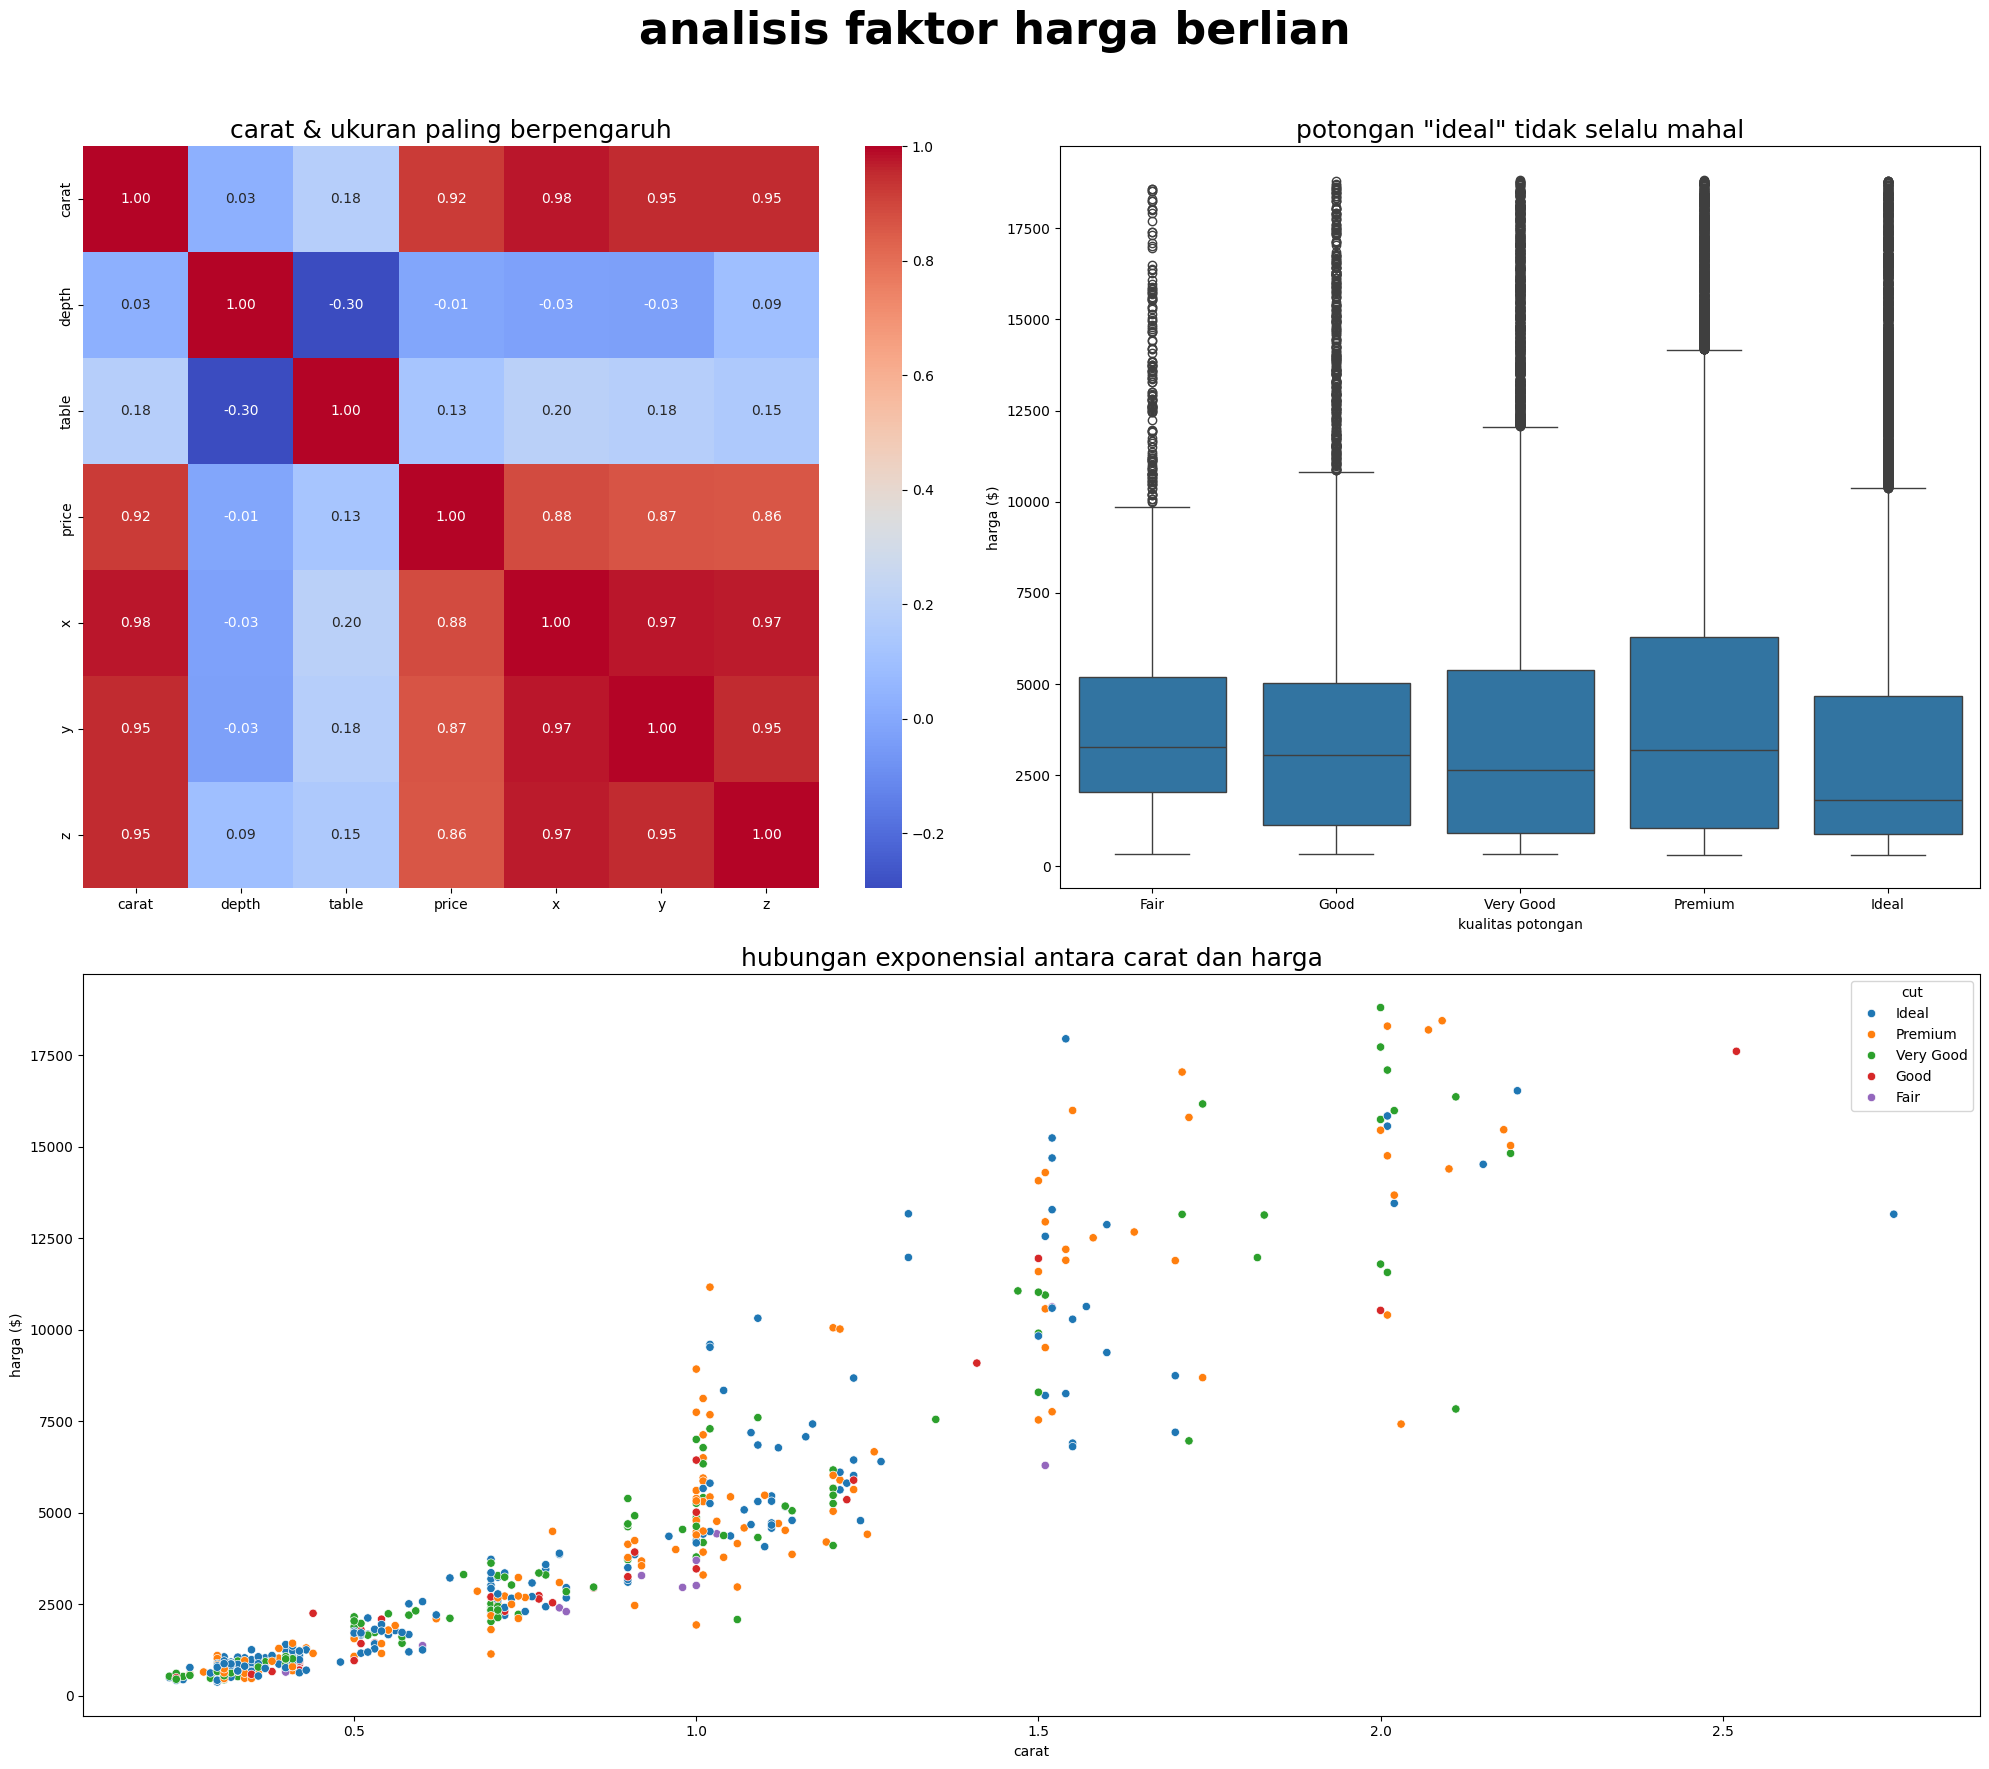

In [25]:
# membuat kanvas 2x2
fig, axis = plt.subplots(2,2,figsize=(20,18))

# judul utama
fig.suptitle('analisis faktor harga berlian', fontsize=32, fontweight='bold')

# plot 1: heatmap kolerasi (Axis(0,0))
sns.heatmap(
    ax=axis[0,0],
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
axis[0,0].set_title('carat & ukuran paling berpengaruh', fontsize=18)

# plot 2: distribusi harga vs kualitas potongan
sns.boxplot(
    ax=axis[0,1],
    data=diamond_df,
    x='cut',
    y='price',
    order=['Fair','Good', 'Very Good', 'Premium', 'Ideal']
)
axis[0,1].set_title('potongan "ideal" tidak selalu mahal', fontsize=18)
axis[0,1].set_xlabel('kualitas potongan')
axis[0,1].set_ylabel('harga ($)')

# plot 3: hubungan utama carat vs price
gs = axis[1,0].get_gridspec()
for ax in axis[1,:]:
    ax.remove()
ax_bottom = fig.add_subplot(gs[1,:])

sns.scatterplot(
    ax=ax_bottom,
    data=sample_df,
    x='carat',
    y='price',
    hue='cut'
)
ax_bottom.set_title('hubungan exponensial antara carat dan harga', fontsize=18)
ax_bottom.set_xlabel('carat')
ax_bottom.set_ylabel('harga ($)')

# merapikan layout
plt.tight_layout(rect=[0,0,1,0.96])

# show and save plt
plt.savefig('styling_finale.pdf')
plt.show()